In [1]:
import pathlib
import pandas as pd

from copairs.map import aggregate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# setting file paths are parameters
MAP_SCORES_DIR = pathlib.Path("../data/processed/mAP_scores/").resolve(strict=True)

# outpath of aggregate scores
AGG_OUT_DIR = pathlib.Path("../data/processed/aggregate_mAPs")
AGG_OUT_DIR.mkdir(exist_ok=True)
AGG_FIGS_DIR = pathlib.Path("../figures/aggregated_mAP_scores/").resolve(strict=True)

In [3]:
# separate file paths based on types of features used:
all_mAP_score_path = list(MAP_SCORES_DIR.glob("*.csv"))

cp_mAP_score_paths = []
dp_mAP_score_paths = []
cp_dp_mAP_score_paths = []
for path in all_mAP_score_path:
    if "_cp_dp_" in path.name:
        cp_dp_mAP_score_paths.append(path)
    elif "_cp_" in path.name:
        cp_mAP_score_paths.append(path)
    elif "_dp_" in path.name:
        dp_mAP_score_paths.append(path)


In [4]:
# now load all data into a dataframe
all_cp_mAP_df = pd.concat([pd.read_csv(cp_mAP_path) for cp_mAP_path in cp_mAP_score_paths])
all_dp_mAP_df = pd.concat([pd.read_csv(dp_mAP_path) for dp_mAP_path in dp_mAP_score_paths])
all_cp_dp_mAP_df = pd.concat([pd.read_csv(cp_dp_mAP_path) for cp_dp_mAP_path in cp_dp_mAP_score_paths])

In [5]:
# separate dataset based on if it is shuffled or not
cp_mAP_df = all_cp_mAP_df.loc[~all_cp_mAP_df["shuffled"]]
shuffled_cp_mAP_df = all_cp_mAP_df.loc[all_cp_mAP_df["shuffled"]]

dp_mAP_df = all_dp_mAP_df.loc[~all_dp_mAP_df["shuffled"]]
shuffled_dp_mAP_df = all_dp_mAP_df.loc[all_dp_mAP_df["shuffled"]]

cp_dp_mAP_df = all_cp_dp_mAP_df.loc[~all_cp_dp_mAP_df["shuffled"]]
shuffled_cp_dp_mAP_df = all_cp_dp_mAP_df.loc[all_cp_dp_mAP_df["shuffled"]]

In [6]:
# Two dataframes are created per feature since there is a shuffle and non-shuffled datasets
# next we aggregate the single cell results based on the phenotype to get the scores
aggregated_cp_aMP_scores = aggregate(cp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.05)
aggregated_cp_aMP_scores["shuffled"] = False
aggregated_cp_aMP_scores["feature_type"] = "CP"

aggregated_shuffled_cp_aMP_scores = aggregate(shuffled_cp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.5)
aggregated_shuffled_cp_aMP_scores["shuffled"] = True
aggregated_shuffled_cp_aMP_scores["feature_type"] = "CP"

aggregated_dp_aMP_scores = aggregate(dp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.05)
aggregated_dp_aMP_scores["shuffled"] = False
aggregated_dp_aMP_scores["feature_type"] = "DP"

aggregated_shuffled_dp_aMP_scores = aggregate(shuffled_dp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.05)
aggregated_shuffled_dp_aMP_scores["shuffled"] = True
aggregated_shuffled_dp_aMP_scores["feature_type"] = "DP"

aggregated_cp_dp_aMP_scores = aggregate(cp_dp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.05)
aggregated_cp_dp_aMP_scores["shuffled"] = False
aggregated_cp_dp_aMP_scores["feature_type"] = "CP_DP"

shuffle_aggregated_cp_dp_aMP_scores = aggregate(shuffled_cp_dp_mAP_df, sameby=["Mitocheck_Phenotypic_Class"], threshold=0.05)
shuffle_aggregated_cp_dp_aMP_scores["shuffled"] = True
shuffle_aggregated_cp_dp_aMP_scores["feature_type"] = "CP_DP"

In [7]:
# saving the non-aggregated dataset
cp_mAP_df.to_csv(AGG_OUT_DIR / "cp_aMP_scores_notshuffled.csv", index=False)
shuffled_cp_mAP_df.to_csv(AGG_OUT_DIR / "cp_aMP_scores_shuffled.csv", index=False)

dp_mAP_df.to_csv(AGG_OUT_DIR / "dp_aMP_scores_notshuffled.csv", index=False)
shuffled_dp_mAP_df.to_csv(AGG_OUT_DIR / "dp_aMP_scores_shuffled.csv", index=False)

cp_dp_mAP_df.to_csv(AGG_OUT_DIR / "cp_dp_aMP_scores_notshuffled.csv", index=False)
shuffled_cp_dp_mAP_df.to_csv(AGG_OUT_DIR / "shuffled_cp_dp_aMP_scores_notshuffled.csv", index=False)

# saving the aggregated files
aggregated_cp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_cp_aMP_notshuffled_scores.csv", index=False)
aggregated_shuffled_cp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_cp_aMP_shuffled_scores.csv", index=False)

aggregated_dp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_dp_aMP_notshuffled_scores.csv", index=False)
aggregated_shuffled_dp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_cp_aMP_shuffled_scores.csv", index=False)

aggregated_cp_dp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_cp_dp_aMP_notshuffled_scores.csv", index=False)
shuffle_aggregated_cp_dp_aMP_scores.to_csv(AGG_OUT_DIR / "aggregated_cp_dp_aMP_shuffled_scores.csv", index=False)

In [8]:
## ploting barcharts
aggregated_cp_aMP_scores.head()


,Mitocheck_Phenotypic_Class,mean_average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,shuffled,feature_type
0,ADCCM,0.991389,1.327776,0.499699,0.301292,True,False,False,CP
1,Anaphase,0.999897,0.453415,0.685262,0.164143,False,False,False,CP
2,Apoptosis,0.999816,0.608901,0.630560,0.200274,False,False,False,CP
3,Binuclear,0.999741,0.182489,0.797686,0.098168,False,False,False,CP
4,Elongated,0.999359,1.054619,0.499699,0.301292,False,False,False,CP


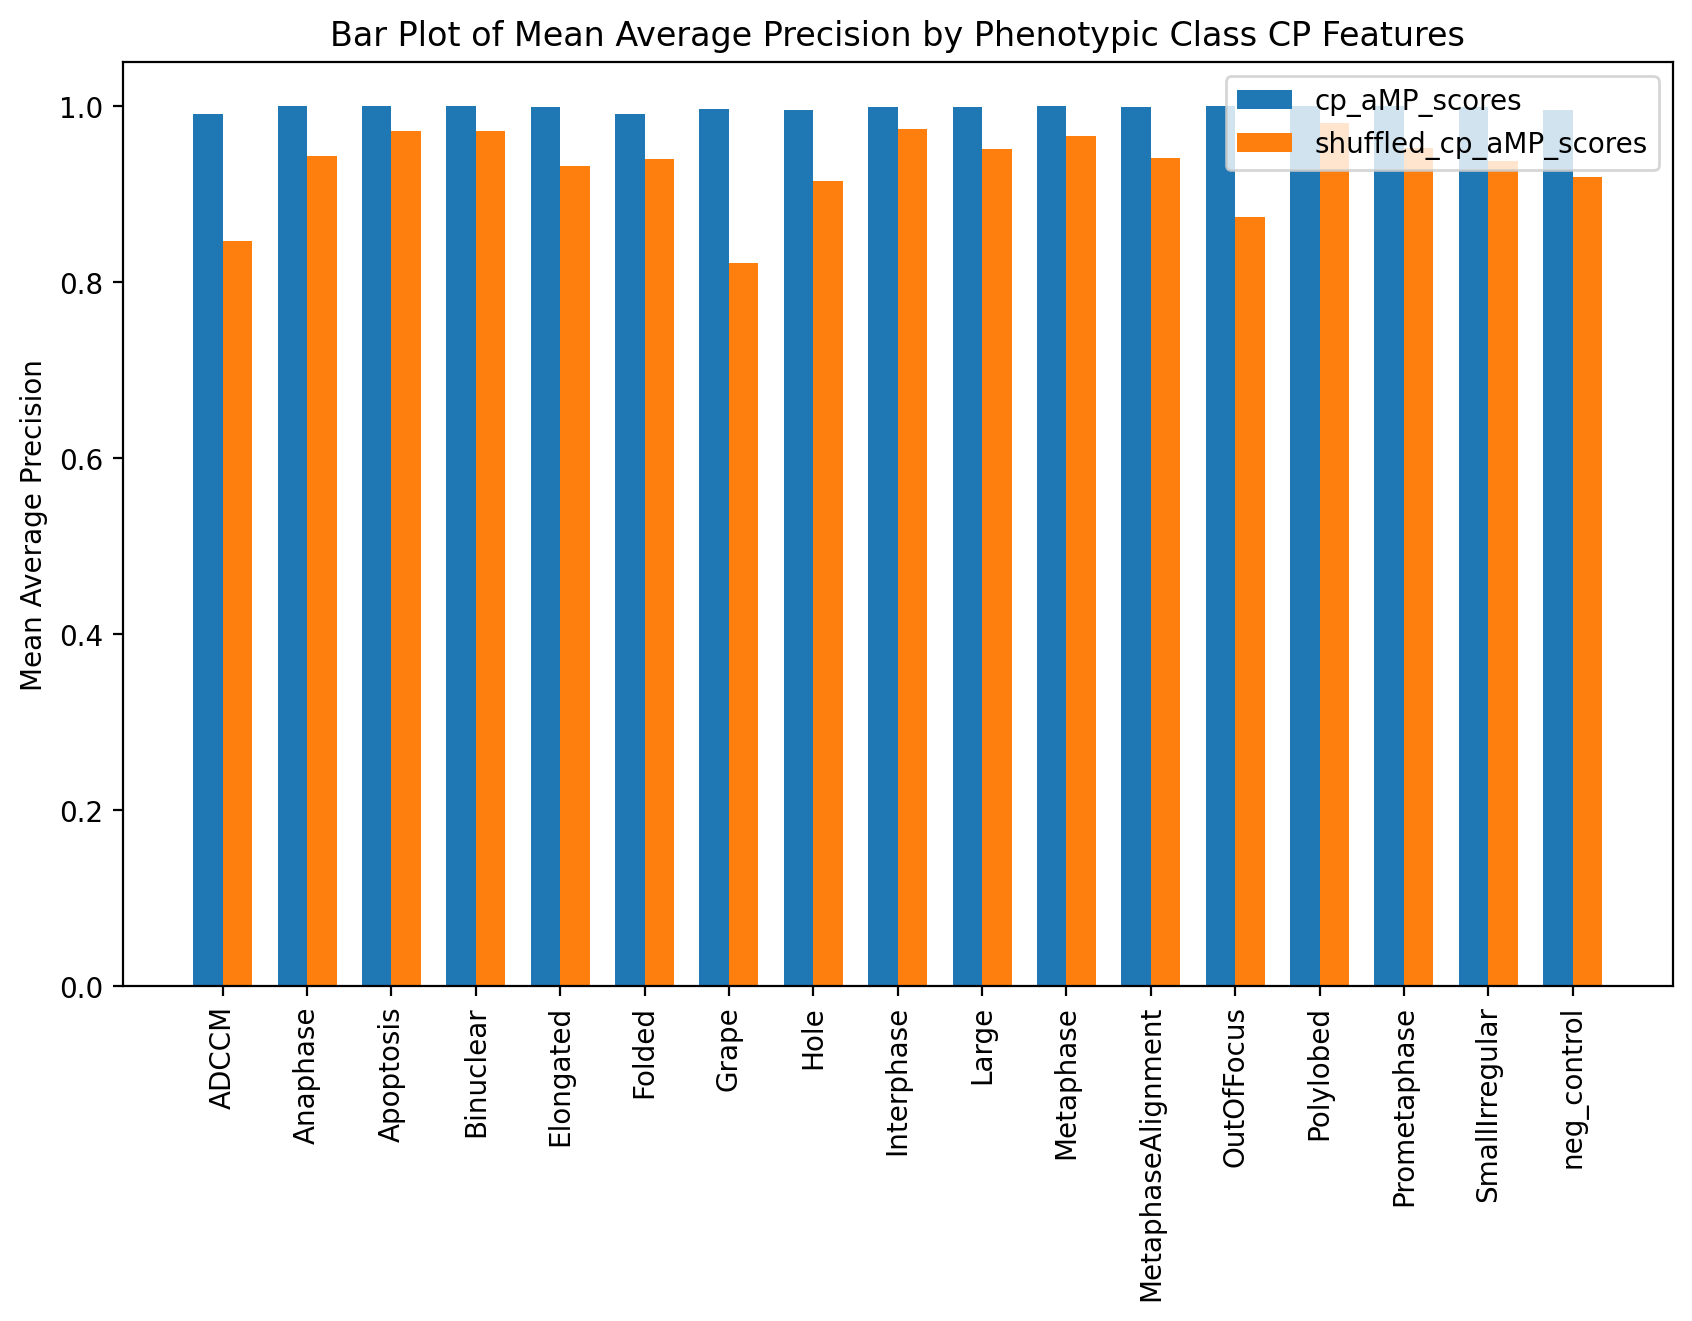

In [9]:

# Plotting
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,6), dpi=200)

# Get the index positions for the bars
indices = np.arange(len(aggregated_cp_aMP_scores['Mitocheck_Phenotypic_Class']))

# Plot the bars for cp_aMP_scores
bar1 = ax.bar(indices - width/2, aggregated_cp_aMP_scores['mean_average_precision'], width, label='cp_aMP_scores')

# Plot the bars for shuffled_cp_aMP_scores
bar2 = ax.bar(indices + width/2, aggregated_shuffled_cp_aMP_scores['mean_average_precision'], width, label='shuffled_cp_aMP_scores')

# Add labels, title, and legend
ax.set_ylabel('Mean Average Precision')
ax.set_title('Bar Plot of Mean Average Precision by Phenotypic Class CP Features')
ax.set_xticks(indices)
ax.set_xticklabels(aggregated_cp_aMP_scores['Mitocheck_Phenotypic_Class'], rotation=90)  # Rotate labels by 90 degrees
ax.legend()

plt.savefig(AGG_FIGS_DIR / "mAP_scores_cp_features_bar_plot.png", bbox_inches="tight")
plt.show()

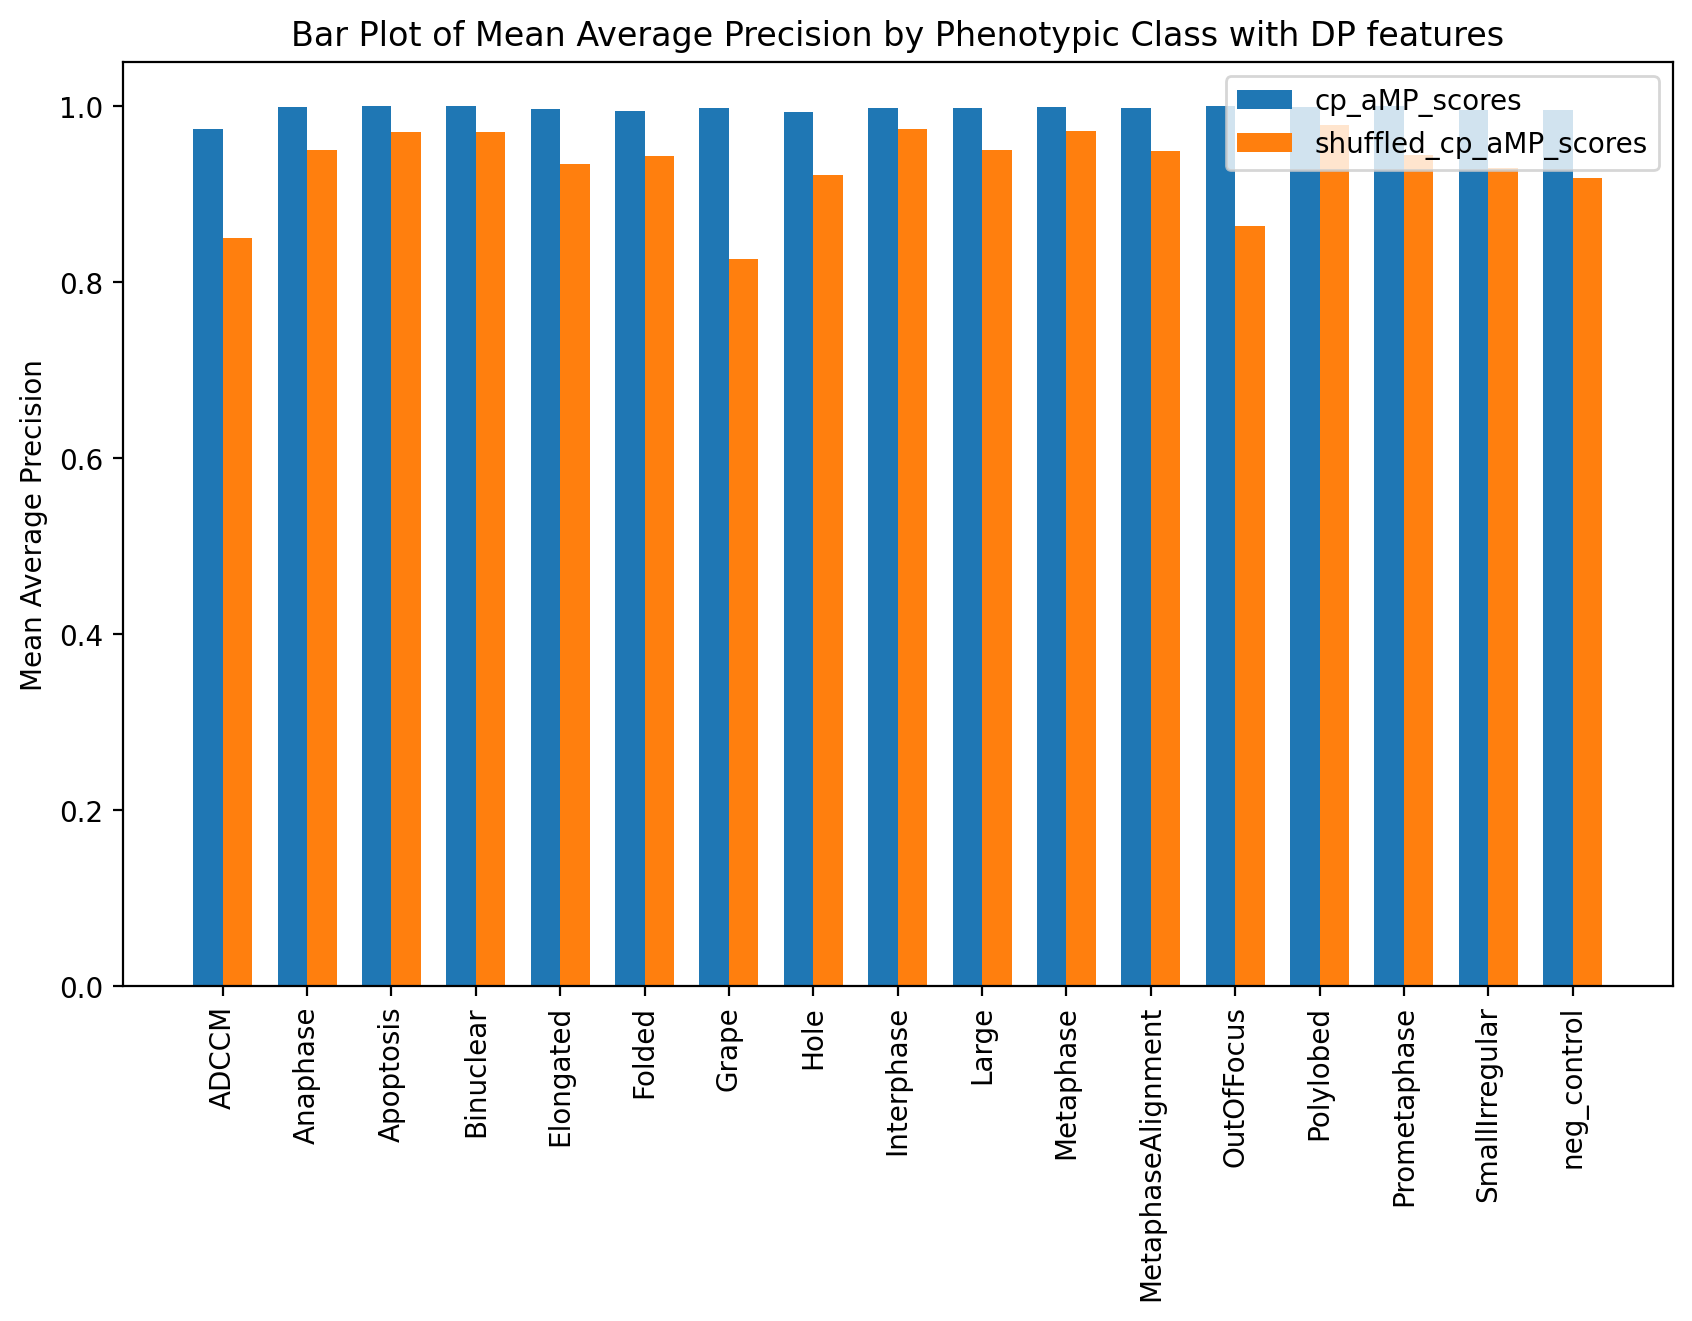

In [10]:
# Plotting
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,6), dpi=200)

# Get the index positions for the bars
indices = np.arange(len(aggregated_dp_aMP_scores['Mitocheck_Phenotypic_Class']))

# Plot the bars for cp_aMP_scores
bar1 = ax.bar(indices - width/2, aggregated_dp_aMP_scores['mean_average_precision'], width, label='cp_aMP_scores')

# Plot the bars for shuffled_cp_aMP_scores
bar2 = ax.bar(indices + width/2, aggregated_shuffled_dp_aMP_scores['mean_average_precision'], width, label='shuffled_cp_aMP_scores')

# Add labels, title, and legend
ax.set_ylabel('Mean Average Precision')
ax.set_title('Bar Plot of Mean Average Precision by Phenotypic Class with DP features')
ax.set_xticks(indices)
ax.set_xticklabels(aggregated_dp_aMP_scores['Mitocheck_Phenotypic_Class'], rotation=90)  # Rotate labels by 90 degrees
ax.legend()
plt.savefig(AGG_FIGS_DIR / "mAP_scores_dp_features_bar_plot.png", bbox_inches="tight")
plt.show()

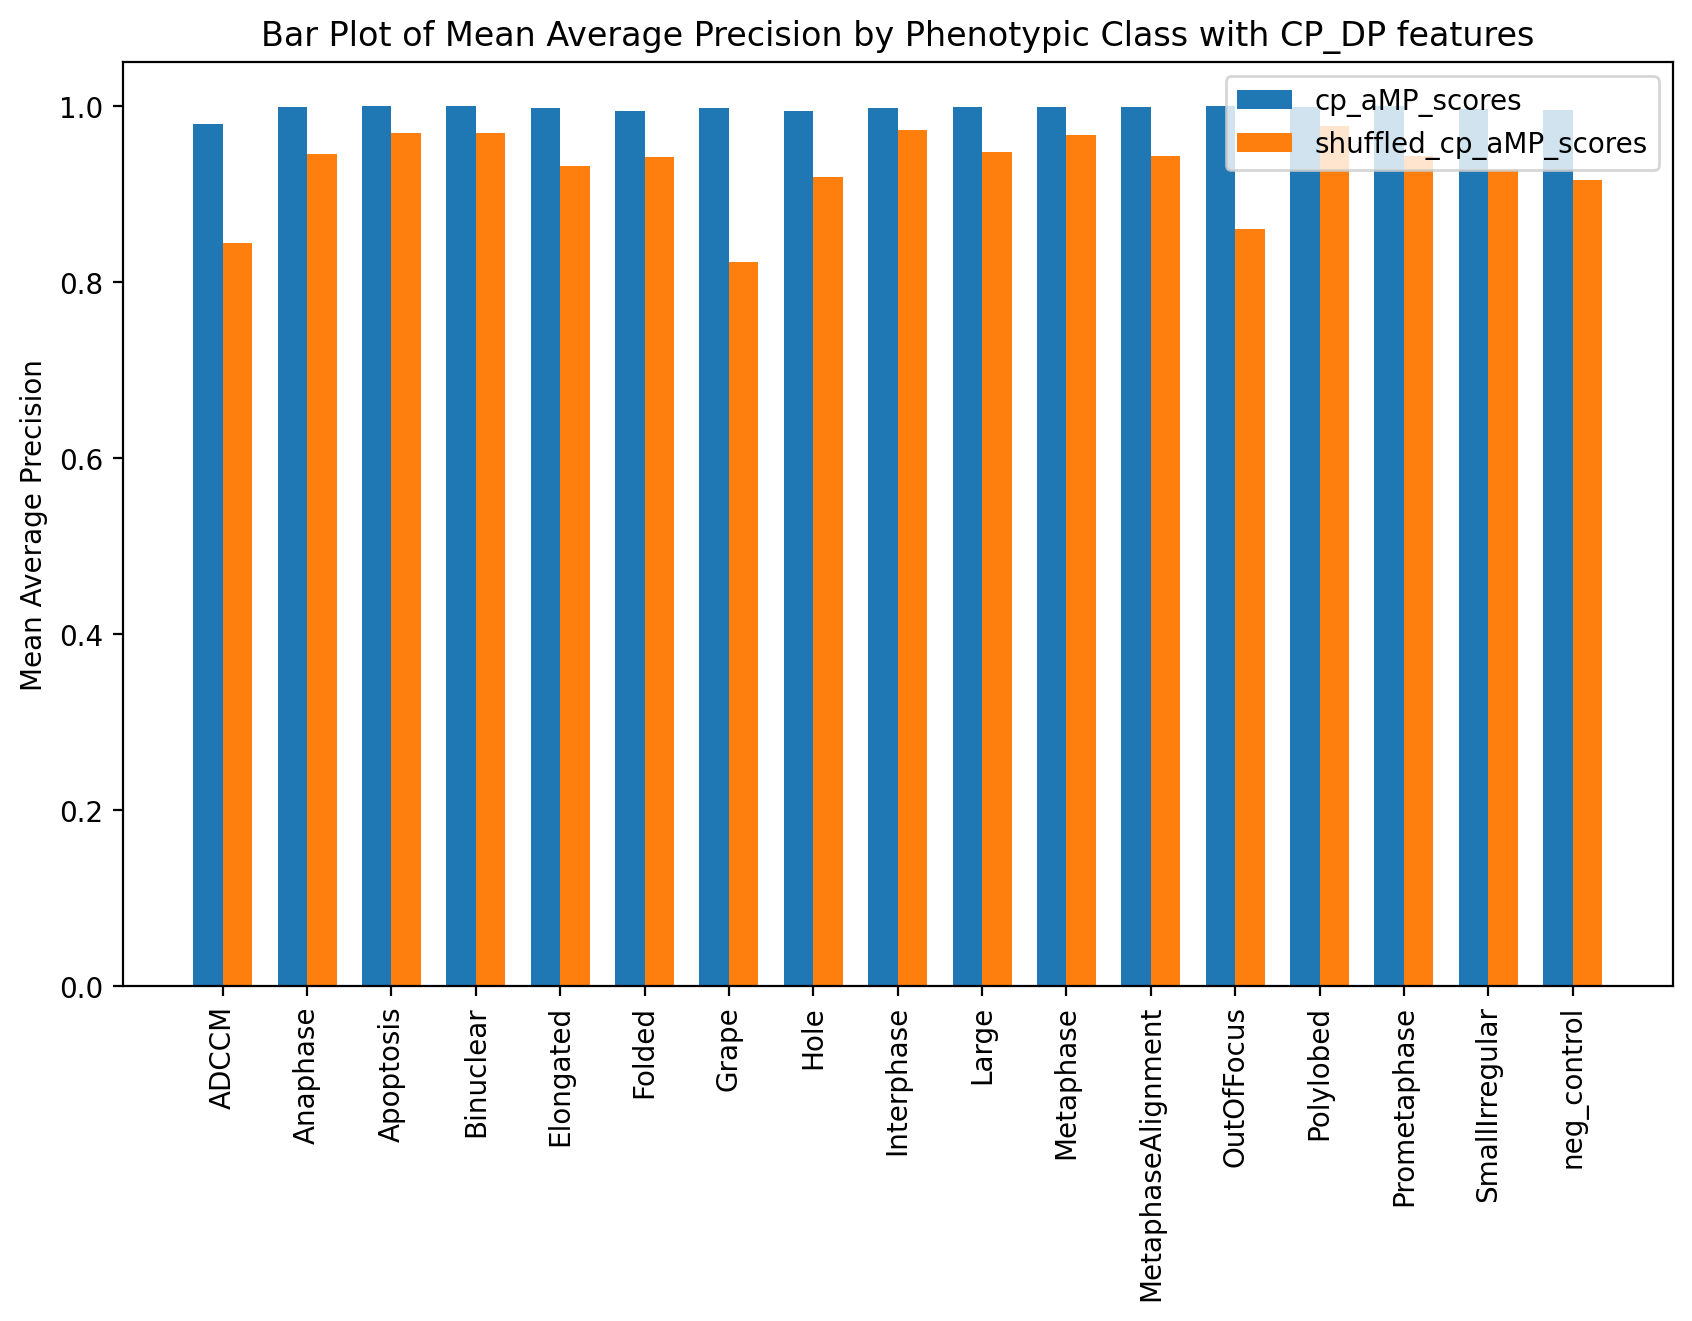

In [11]:
# Plotting
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,6), dpi=200)

# Get the index positions for the bars
indices = np.arange(len(aggregated_cp_dp_aMP_scores['Mitocheck_Phenotypic_Class']))

# Plot the bars for cp_aMP_scores
bar1 = ax.bar(indices - width/2, aggregated_cp_dp_aMP_scores['mean_average_precision'], width, label='cp_aMP_scores')

# Plot the bars for shuffled_cp_aMP_scores
bar2 = ax.bar(indices + width/2, shuffle_aggregated_cp_dp_aMP_scores['mean_average_precision'], width, label='shuffled_cp_aMP_scores')

# Add labels, title, and legend
ax.set_ylabel('Mean Average Precision')
ax.set_title('Bar Plot of Mean Average Precision by Phenotypic Class with CP_DP features')
ax.set_xticks(indices)
ax.set_xticklabels(aggregated_cp_dp_aMP_scores['Mitocheck_Phenotypic_Class'], rotation=90)  # Rotate labels by 90 degrees
ax.legend()

plt.savefig(AGG_FIGS_DIR / "mAP_scores_cp_dp_features_bar_plot.png", bbox_inches="tight")
plt.show()